# Image Comparision

## By comparing two images we can detect if both the images are same or not, or if there is any damage the program detects where the error occured

##  This is done by croping the image and converting the two images to the same size, and then comparing side by side

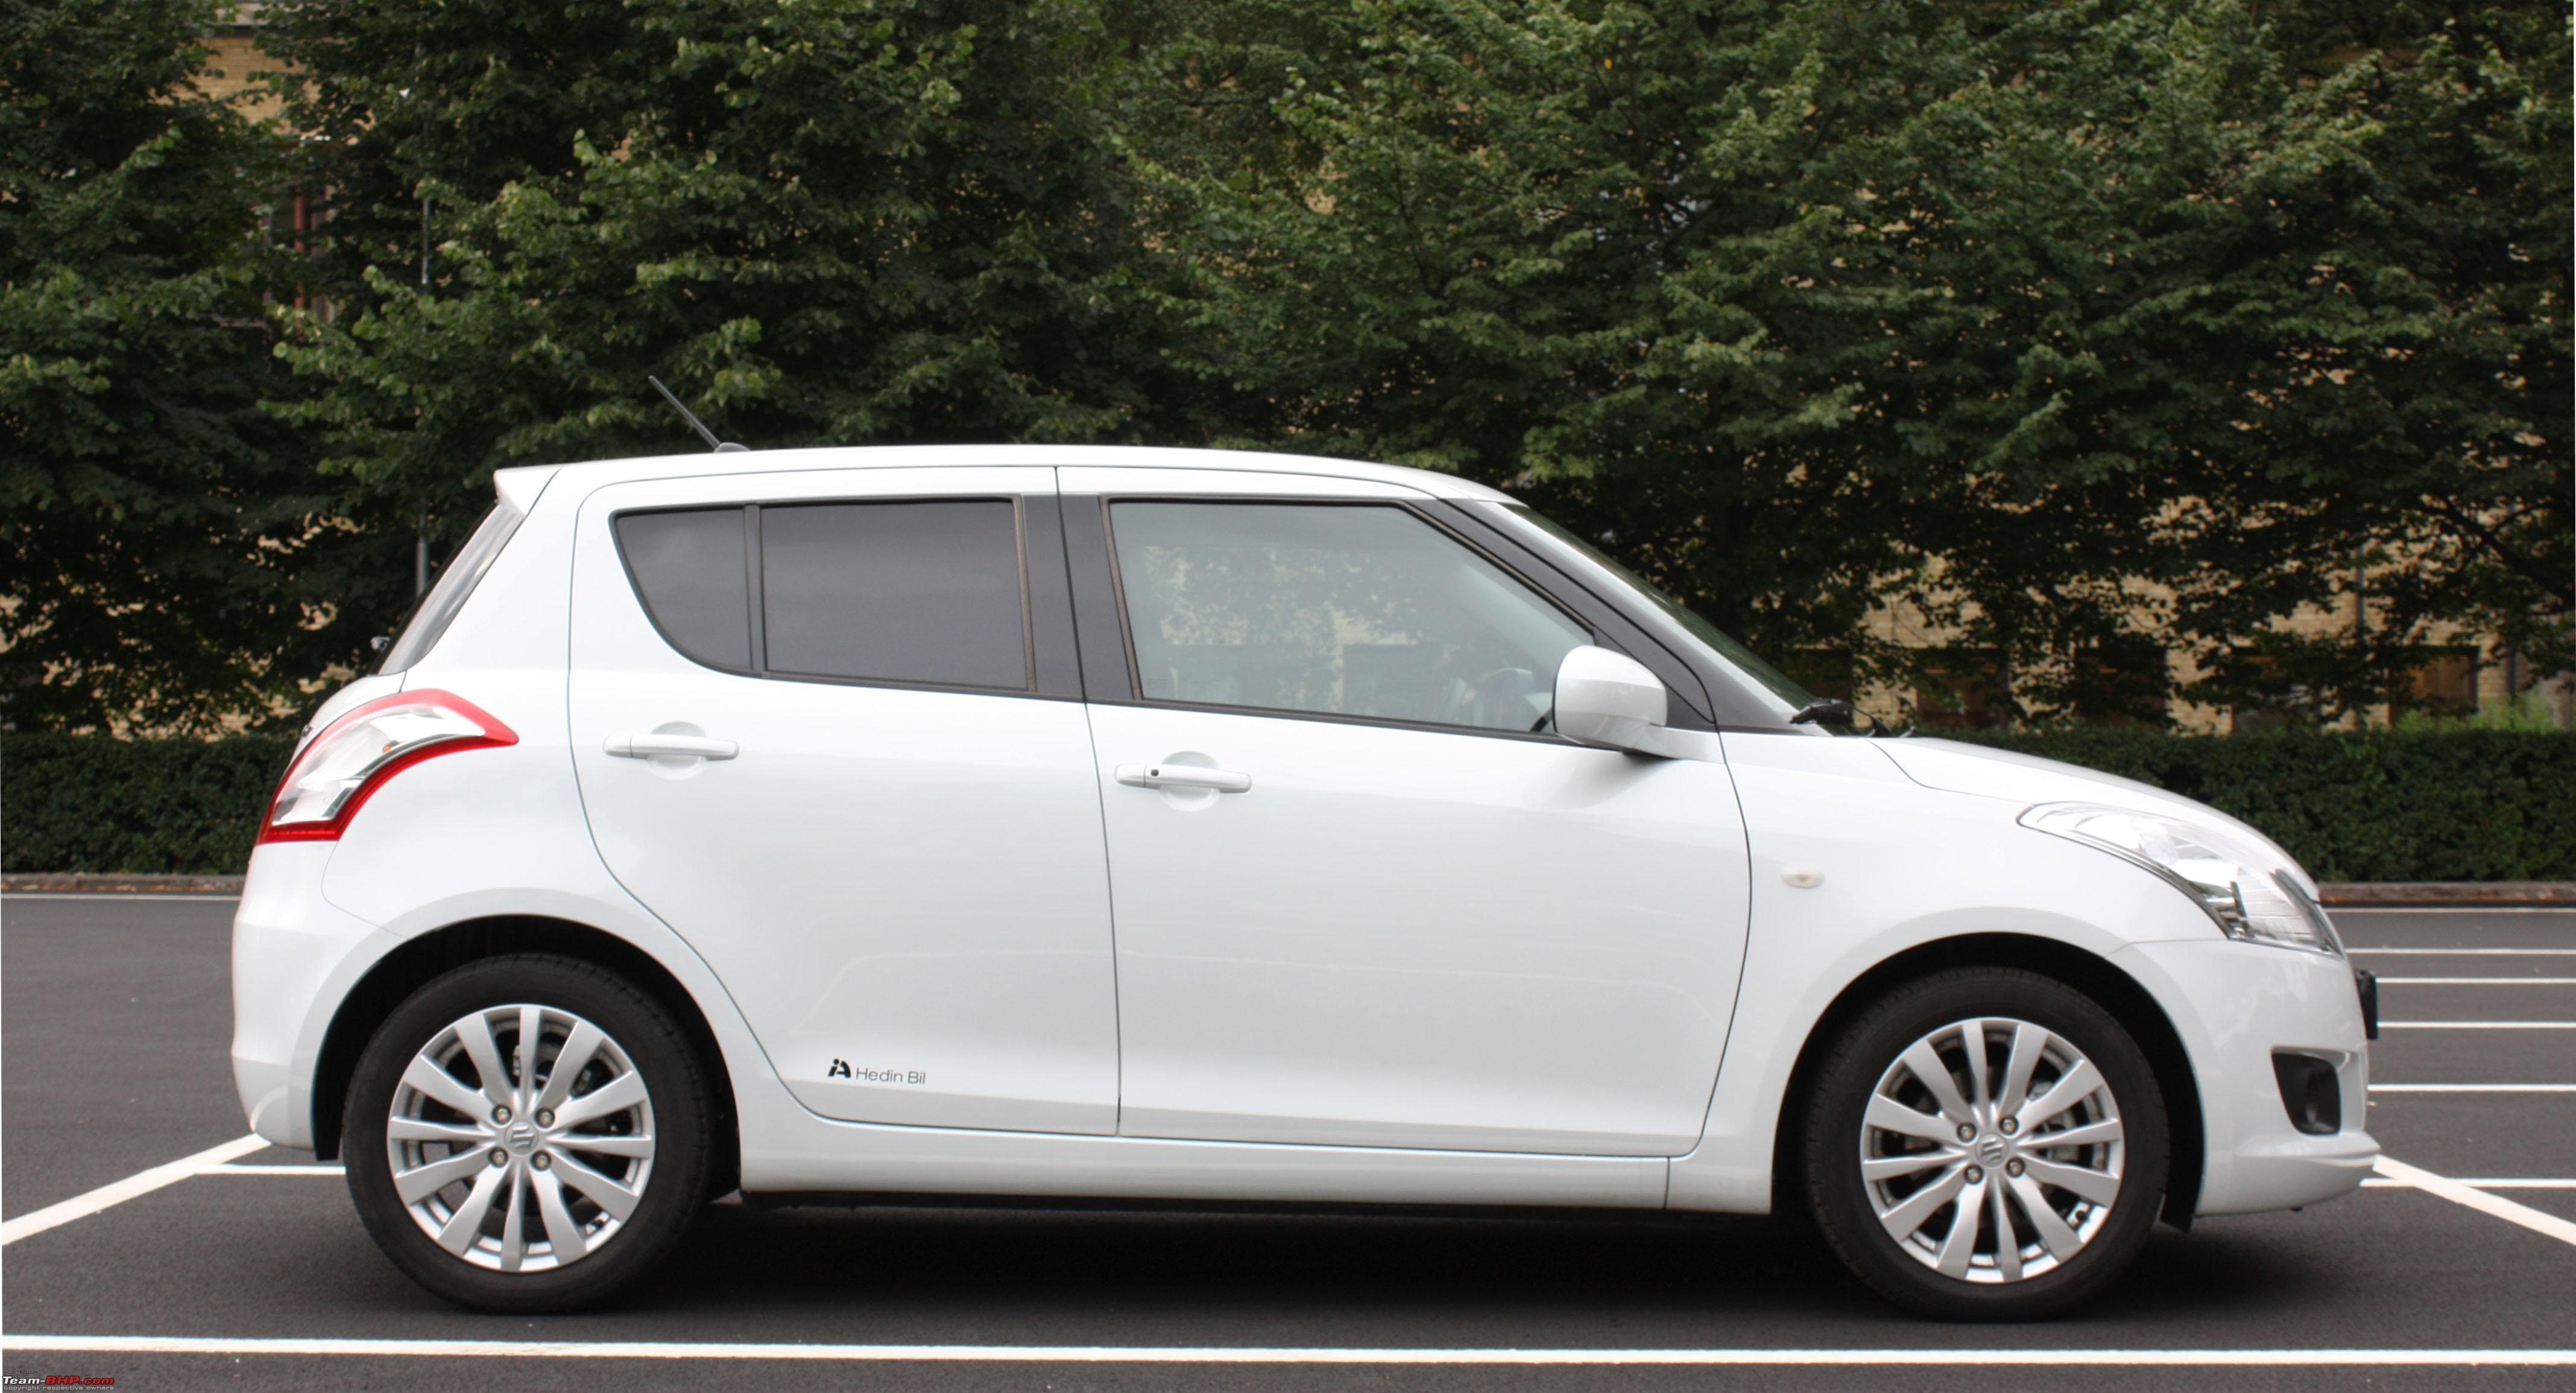

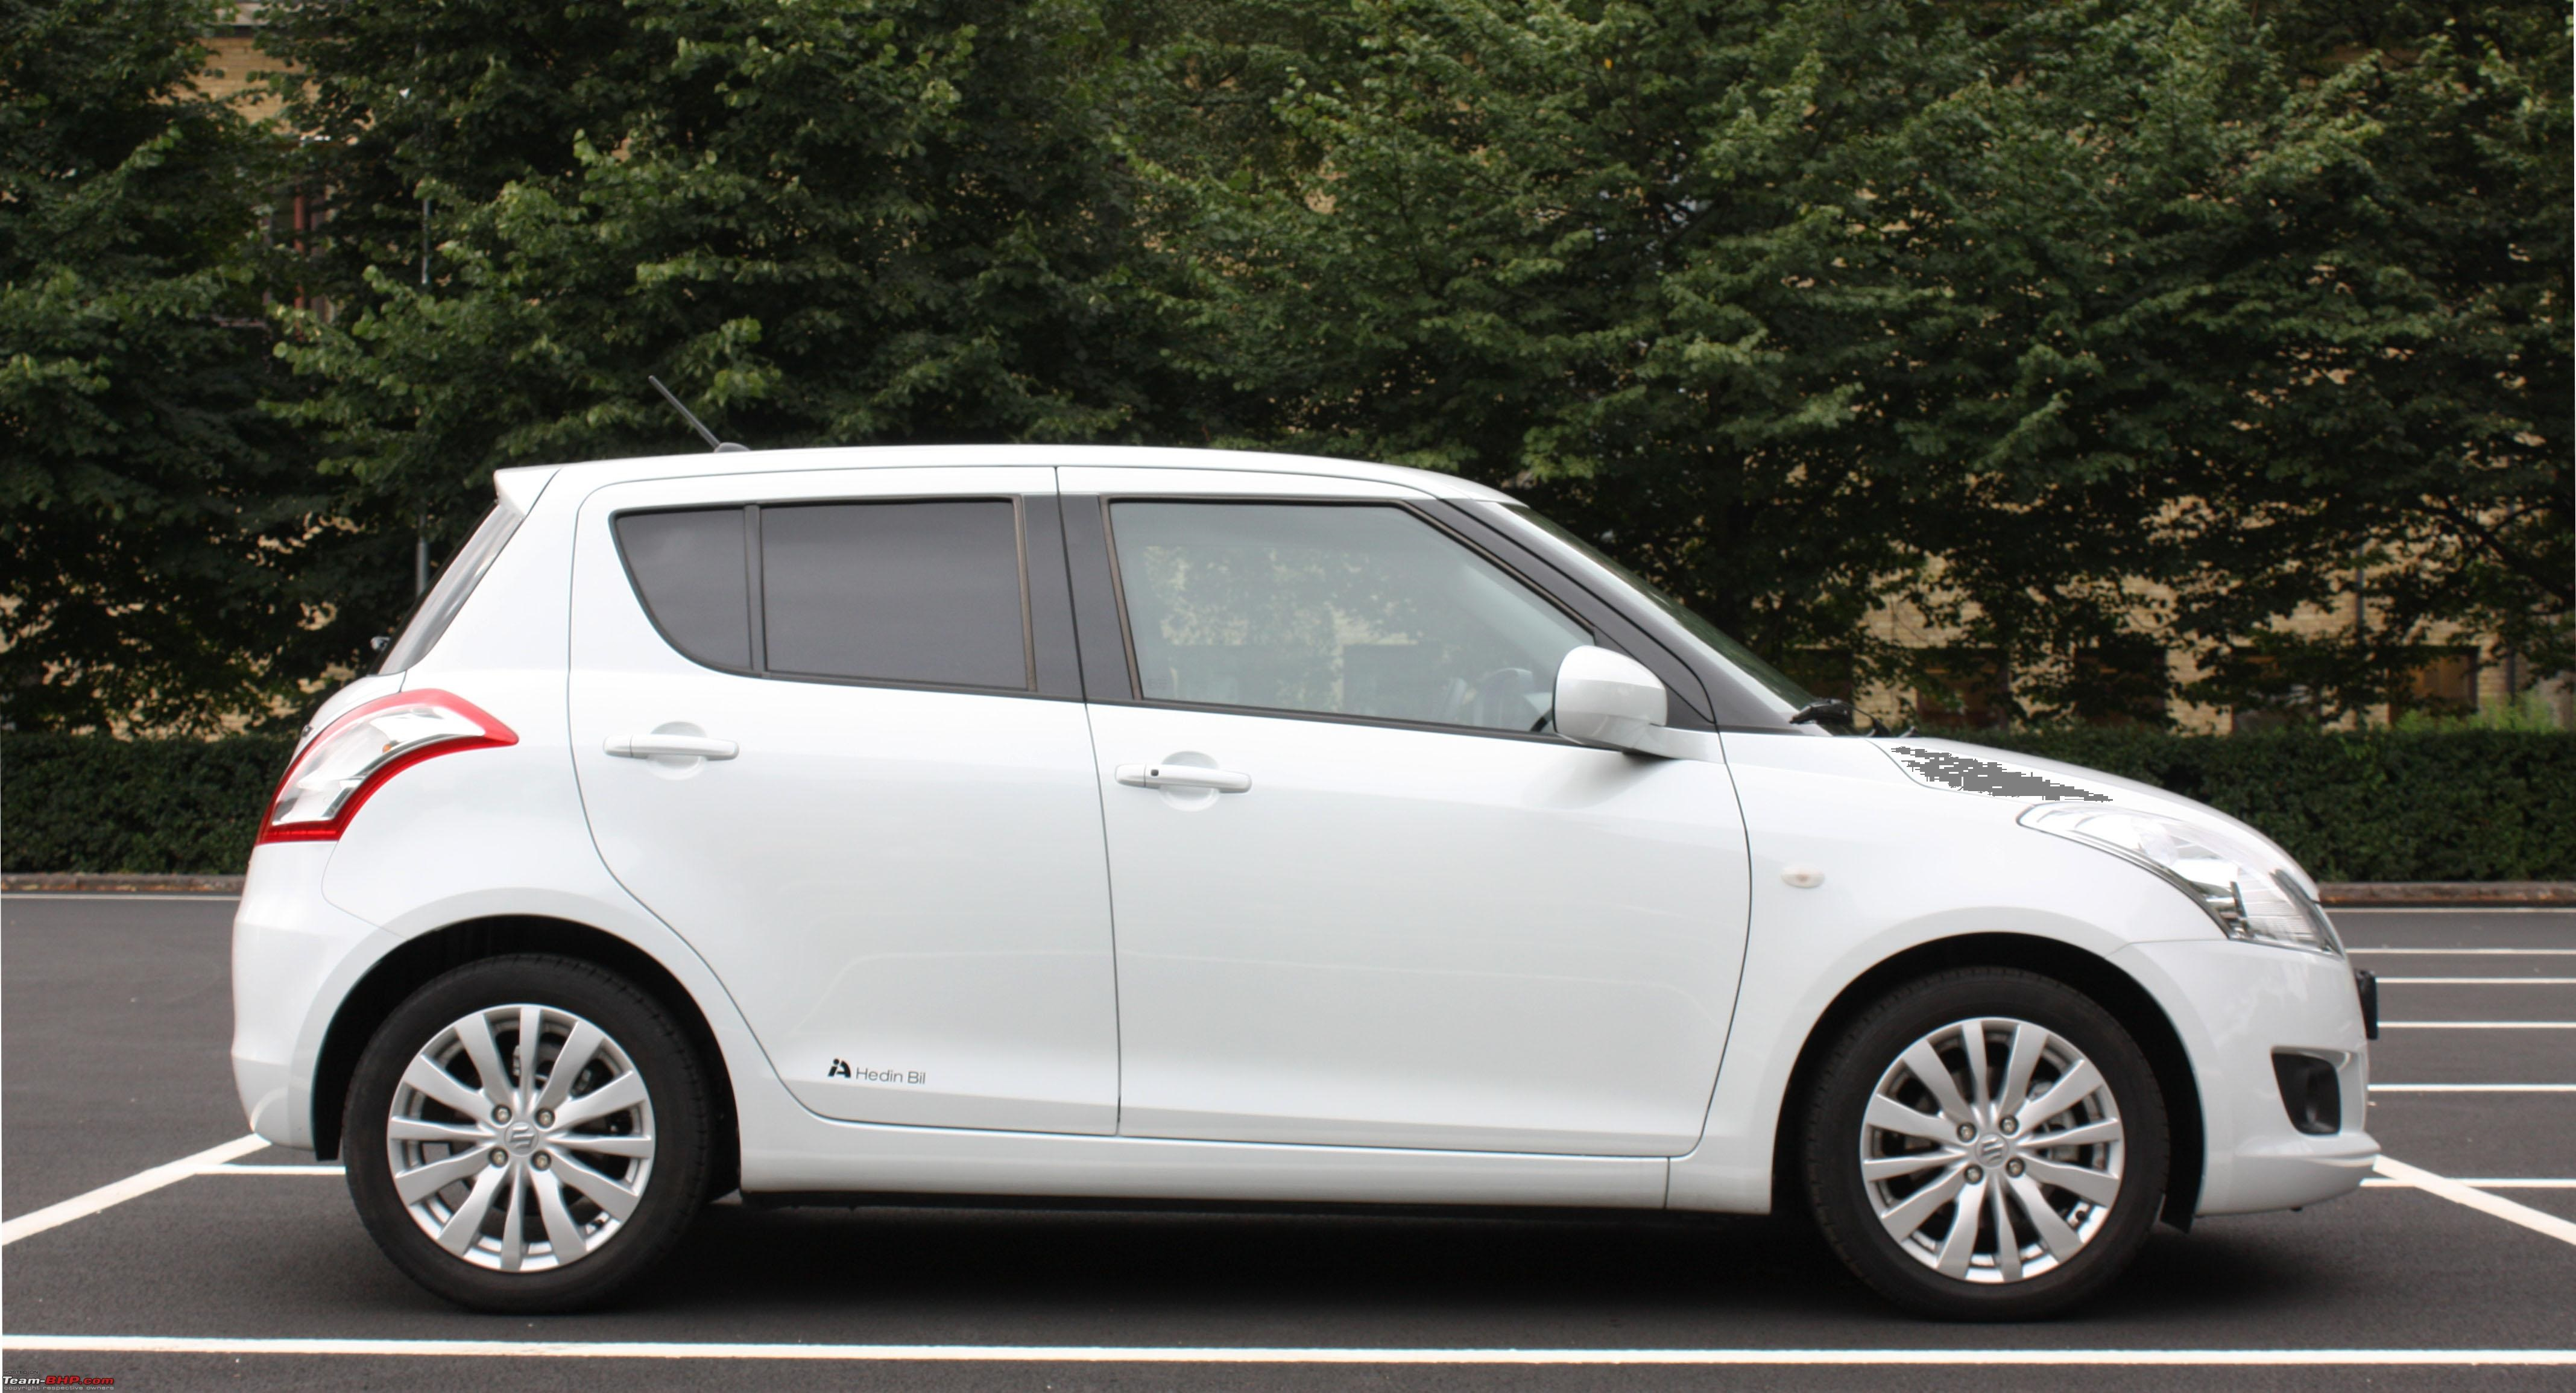

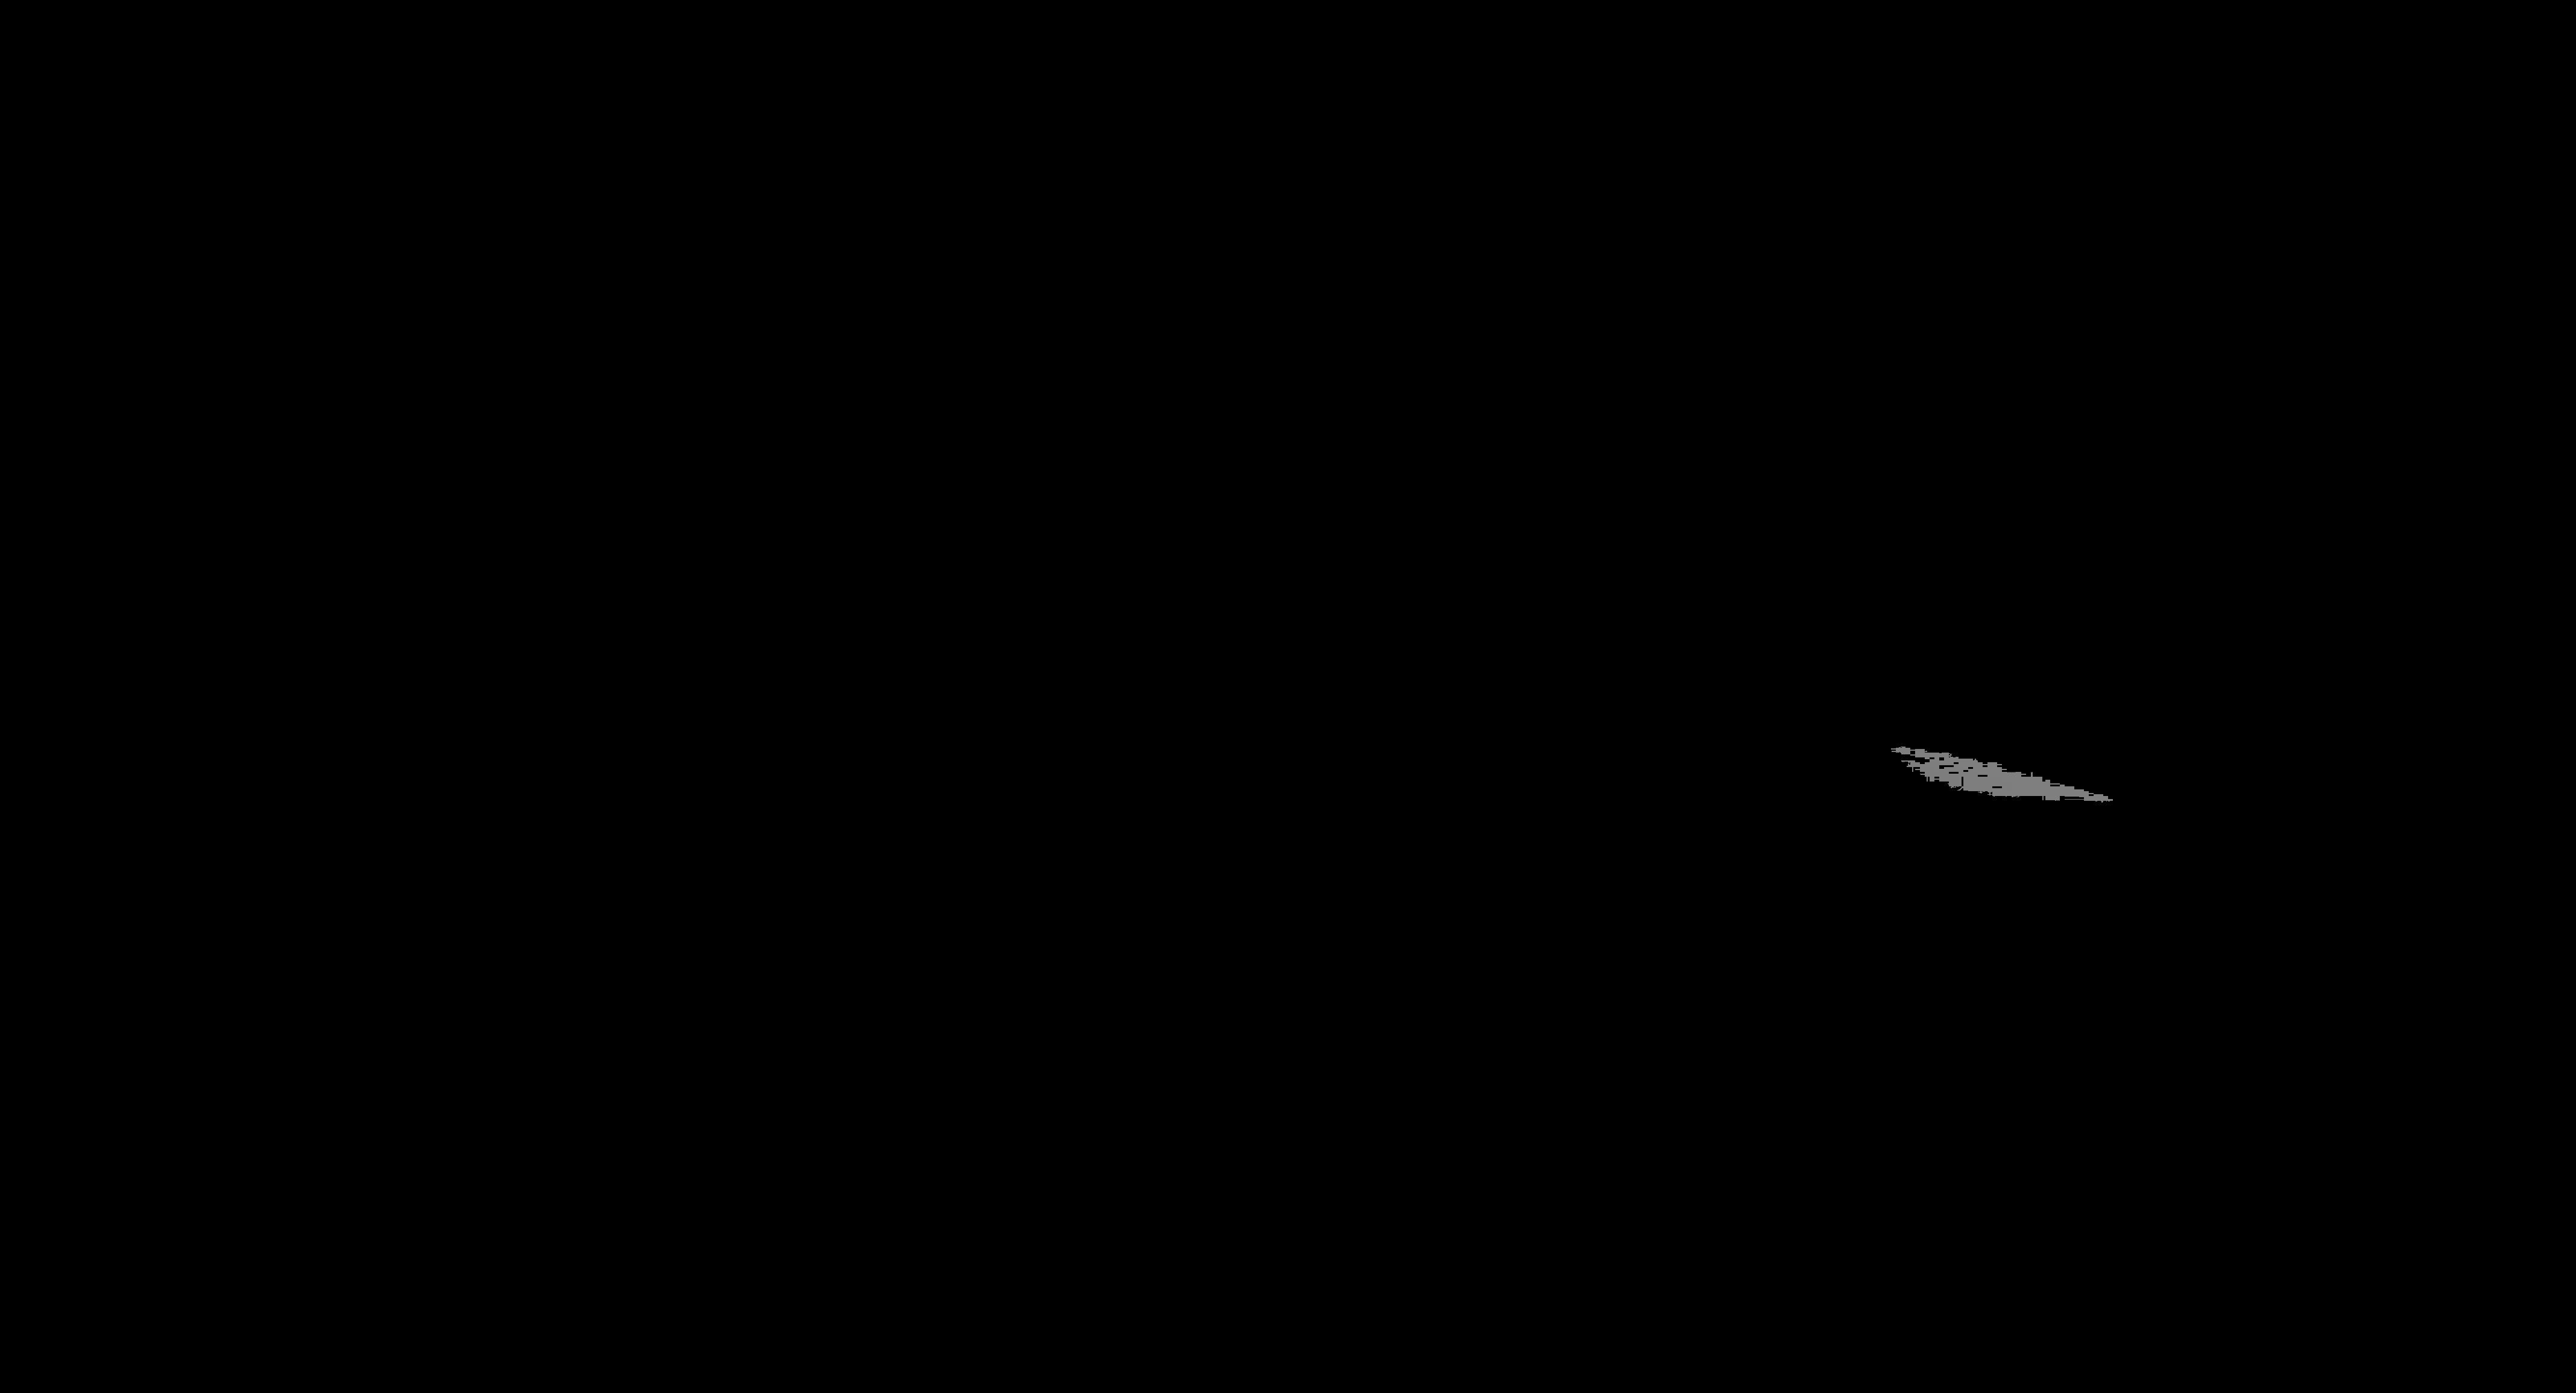

In [84]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/ImageProcess/side_view.jpg') 
y = Image(filename='/home/bharath/ImageProcess/side_view_damage.jpg') 
z = Image(filename='/home/bharath/ImageProcess/myimage.jpg') 
display(x, y,z)

### This approach is not the best because for every image angle differs so we cant say exactly where the part of the car exist.

#     

# So here's where Machine Learning comes 

## Deep Learning is a sub field of ML, which is used to implement image analysis

## This damage detection is sub divided into 

###   1.Image Segmentation.
###   2.Image Classification.
###   3.Semantic Segmentation.
###   4.Image comparision

#   

#  

# Image Classification

## Recognizing brand and model of the car which is uploaded by customer 

## ...  Tensorflow and Keras are the deep leaning implementation tools

## Library Modules

In [147]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

In [149]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

## Size of an Image

In [150]:
img_rows, img_cols = 100,100

In [151]:
img_channels = 1

In [152]:
path1='/home/bharath/car_model/alto'
path2='/home/bharath/car_model/creta'
path3='/home/bharath/car_model/verna'
path='/home/bharath/car_model/resize_model'

In [153]:
listing1 = os.listdir(path1) 
listing2 = os.listdir(path2)
listing3 = os.listdir(path3) 

## Scaling Maruti Alto Cars

In [154]:
for file in listing1:
    im = Image.open(path1 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')          
    img.save(path +'/' +  file, "JPEG")

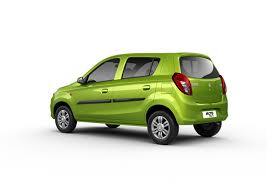

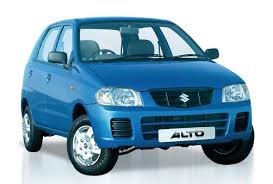

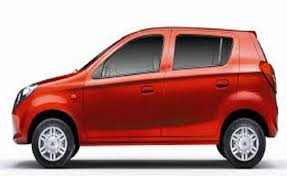

In [155]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/car_model/alto/alto.jpg') 
y = Image(filename='/home/bharath/car_model/alto/alto (2).jpg') 
z = Image(filename='/home/bharath/car_model/alto/alto (3).jpg') 
display(x, y,z)

## Scaling Hyundai Creta Cars

In [156]:
from PIL import Image
for file in listing2:
    im = Image.open(path2 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')          
    img.save(path +'/' +  file, "JPEG")

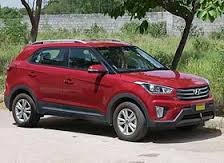

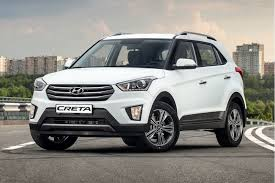

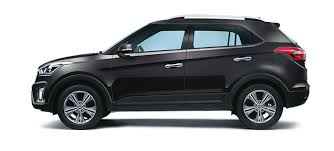

In [157]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/car_model/creta/hundai.jpg') 
y = Image(filename='/home/bharath/car_model/creta/hundai (2).jpg') 
z = Image(filename='/home/bharath/car_model/creta/hundai (15).jpg') 
display(x, y,z)

## Scaling Hyundai Verna Cars

In [191]:
from PIL import Image
for file in listing3:
    im = Image.open(path3 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')          
    img.save(path +'/' +  file, "JPEG")

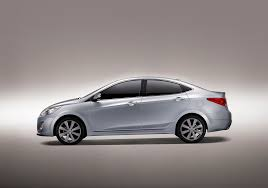

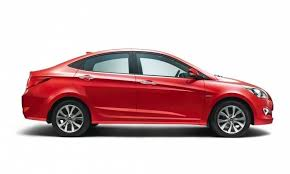

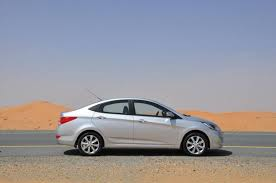

In [159]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/car_model/verna/verna.jpg') 
y = Image(filename='/home/bharath/car_model/verna/verna (2).jpg') 
z = Image(filename='/home/bharath/car_model/verna/verna (5).jpg') 
display(x, y,z)

In [160]:
from scipy import ndimage

In [161]:
immatrix=[]
for imageName in sorted(os.listdir("/home/bharath/car_model/resize_model/")):
    immatrix.append(ndimage.imread("/home/bharath/car_model/resize_model/%s"%(imageName)))

In [162]:
imp=np.array(immatrix)

In [163]:
print imp.shape

(274, 100, 100, 3)


In [164]:
label=np.ones((274,),dtype = int)
label[0:105]=0
label[105:199]=1
label[199:274]=2

In [165]:
X,Y= shuffle(imp,label, random_state=4)

In [166]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20

In [167]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 1

In [168]:
X = X.astype('float32')
X/=255

In [169]:
Y = np_utils.to_categorical(Y, nb_classes)

In [170]:
from PIL import Image

## Training model with cars

In [171]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(1))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [172]:
im = Image.open('/home/bharath/car_model/predict_model/creta12.jpg')  
img = im.resize((img_rows,img_cols))      
img.save('/home/bharath/car_model/file.jpg' )

In [173]:
img=[]
img.append(ndimage.imread("/home/bharath/car_model/file.jpg"))

In [174]:
def names(a):
    if(a==0):
        return 'ALTO'
    elif(a==1):
        return 'CRETA'
    elif(a==2):
        return 'VERNA'

In [175]:
hist = model.fit(X, Y, batch_size=batch_size, nb_epoch=100, verbose=1)

Epoch 1/100
274/274 [==============================] - 0s - loss: 1.2217     
Epoch 2/100
274/274 [==============================] - 0s - loss: 1.1276     

In [176]:
itest = Image.open('/home/bharath/car_model/predict_model/creta12.jpg')  
imtest = itest.resize((img_rows,img_cols))      
imtest.save('/home/bharath/car_model/file.jpg' )

In [177]:
imgs=[]
imgs.append(ndimage.imread("/home/bharath/car_model/file.jpg"))

In [178]:
ba=np.asarray(imgs)
ab=model.predict_classes(ba)

1/1 [==============================] - 0s


In [179]:
asd=names(ab)

In [180]:
print asd

CRETA


In [181]:
itest1 = Image.open('/home/bharath/car_model/predict_model/verna12.jpg')  
imtest1 = itest1.resize((img_rows,img_cols))      
imtest1.save('/home/bharath/car_model/file1.jpg' )

In [182]:
imgs1=[]
imgs1.append(ndimage.imread("/home/bharath/car_model/file1.jpg"))

In [183]:
ba1=np.asarray(imgs1)
ab1=model.predict_classes(ba1)

1/1 [==============================] - 0s


VERNA


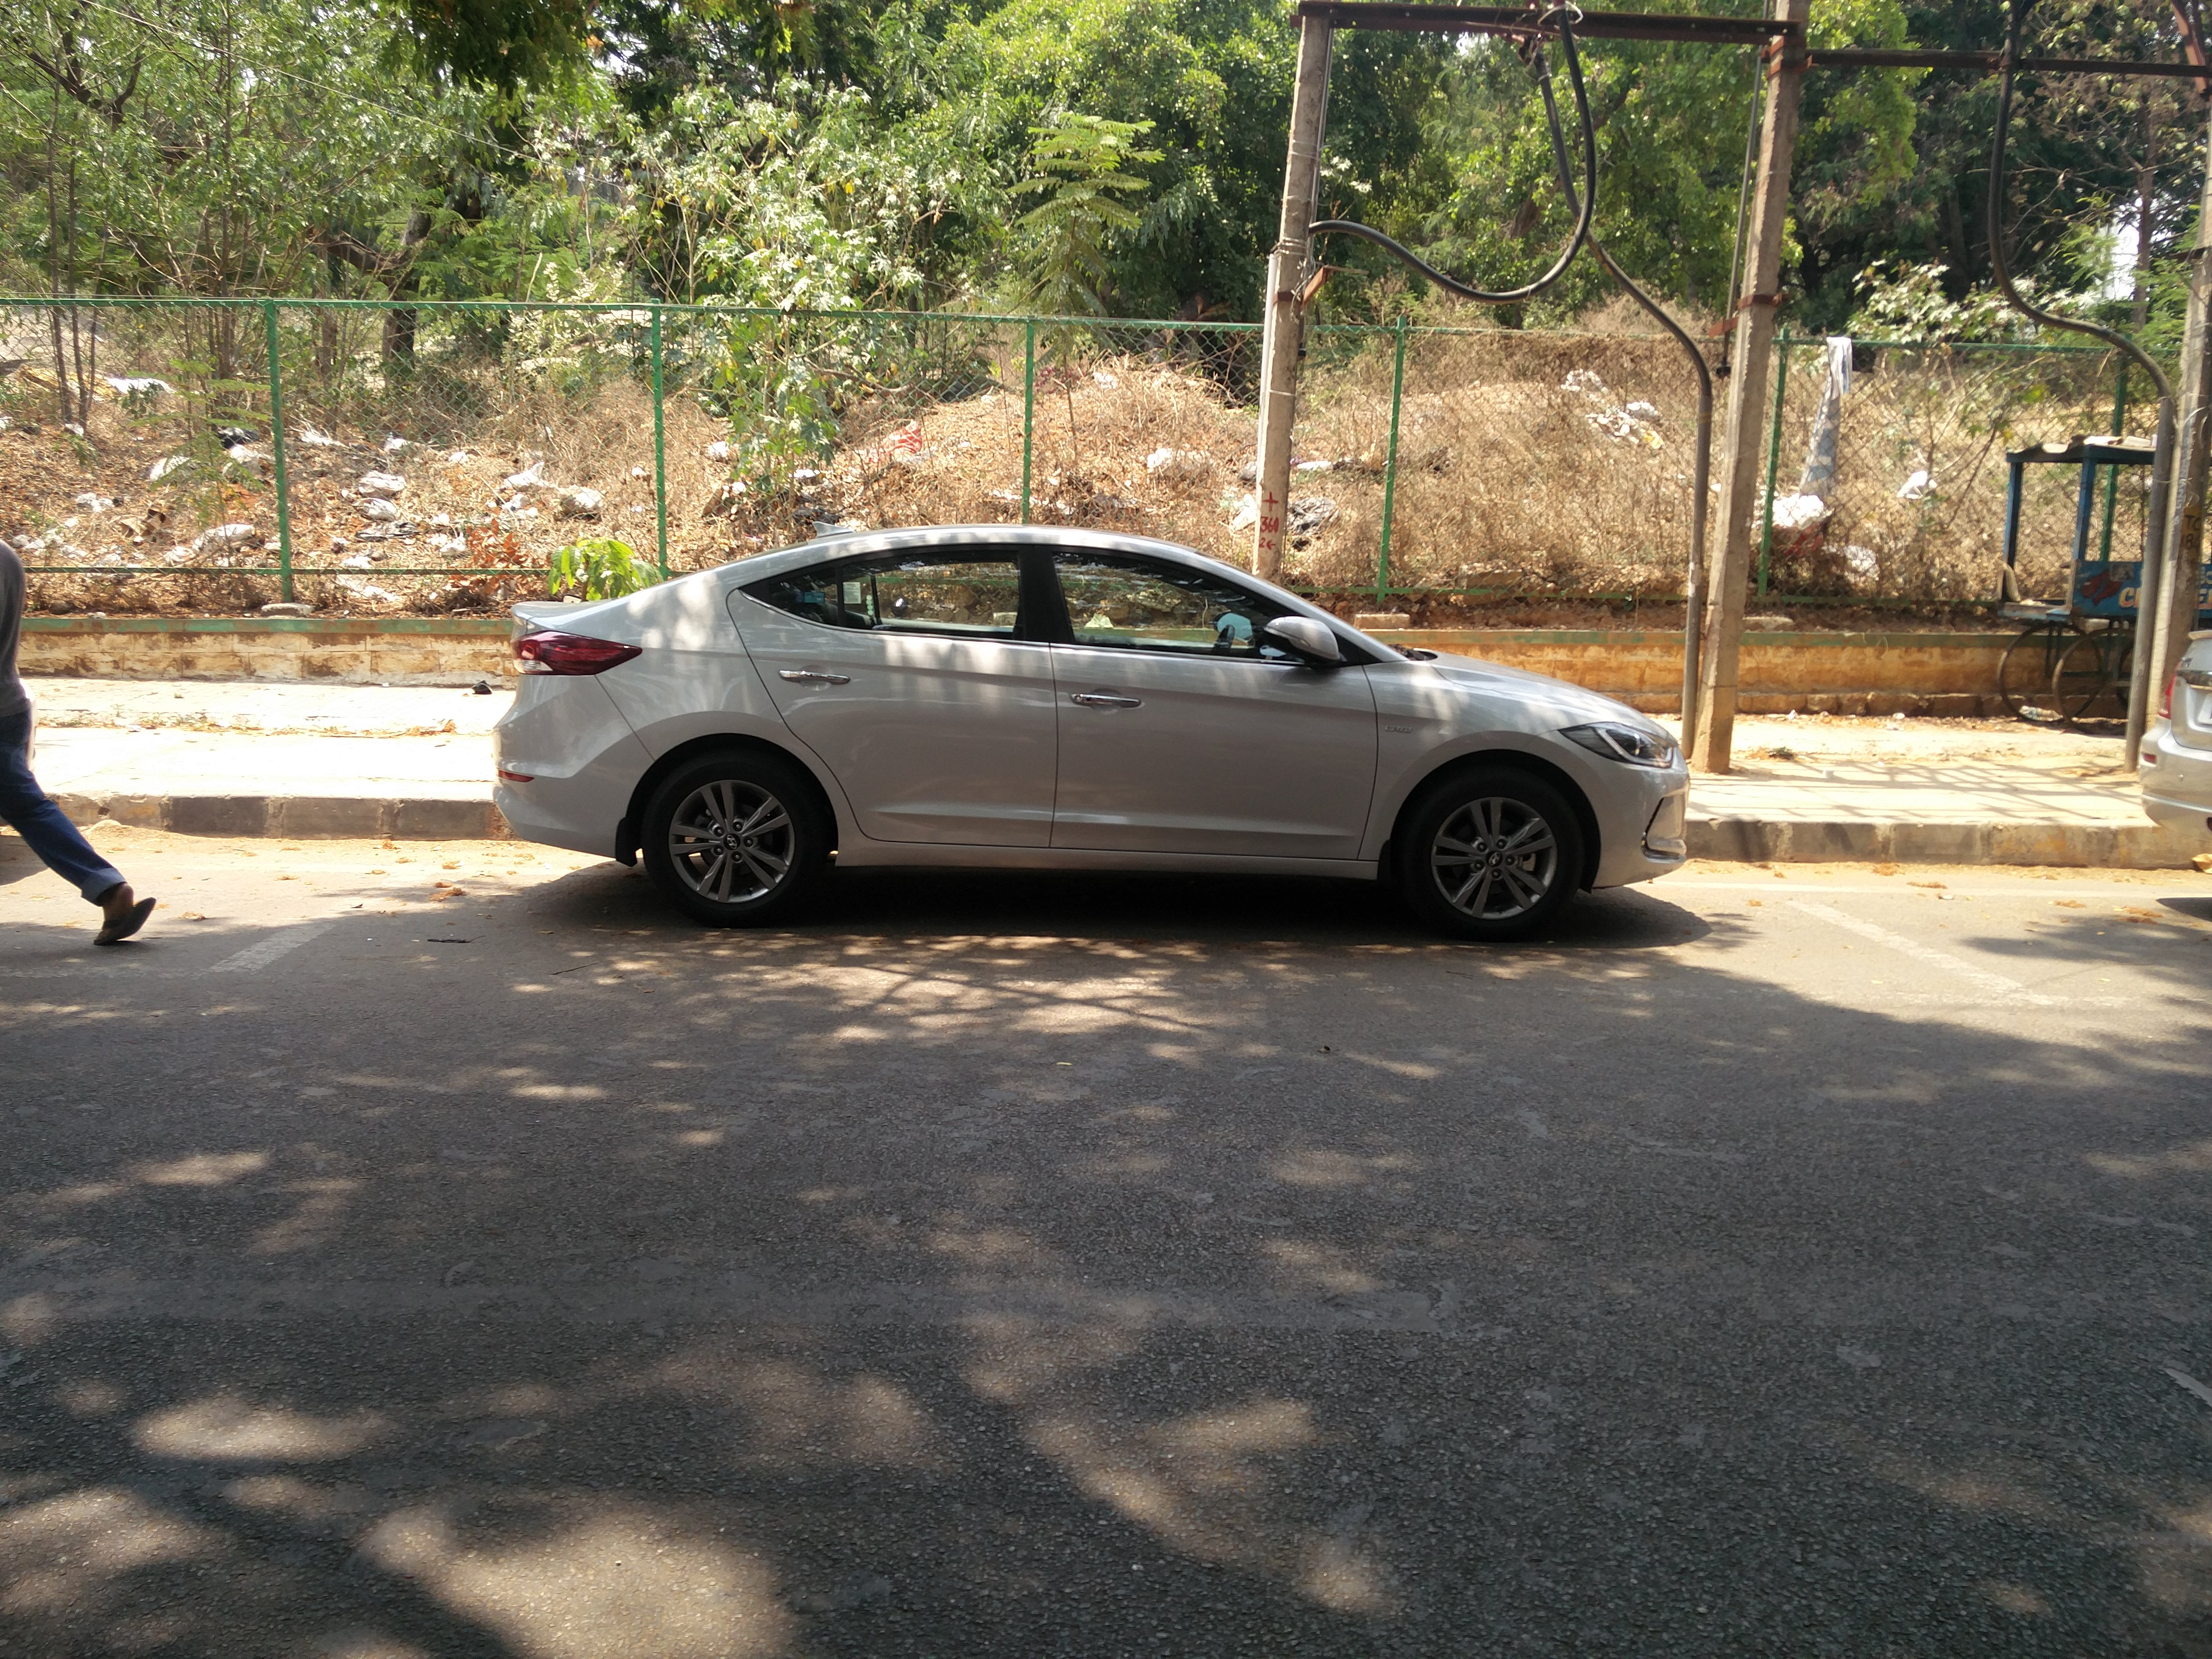

In [184]:
asd1=names(ab1)
print asd1
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/car_model//predict_model/verna12.jpg')  
display(x)

In [187]:
from PIL import Image
itest2 = Image.open('/home/bharath/car_model/predict_model/alto.jpg')  
imtest2 = itest2.resize((img_rows,img_cols))      
imtest2.save('/home/bharath/car_model/file3.jpg' )

In [188]:
imgs2=[]
imgs2.append(ndimage.imread("/home/bharath/car_model/file3.jpg"))

In [189]:
ba2=np.asarray(imgs2)
ab2=model.predict_classes(ba2)

1/1 [==============================] - 0s


In [190]:
asd2=names(ab2)
print asd2

ALTO


# Semantic Segmentation

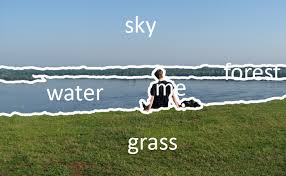

In [194]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/home/bharath/index.jpeg') 
 
display(x)